In [15]:
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell
%load_ext autoreload
InteractiveShell.ast_node_interactivity = "all"
import logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Load data

In [17]:
result_dir = "/cmnfs/proj/ORIGINS/data/brain/FreshFrozenBrain/SingleShot/DDA/frame0_1830_ssDDA_P064428_Fresh1_5ug_R1_BD5_1_4921_ScanByScan_RTtol0.9_threshold_missabthres0.5_convergence_NoIntercept_pred_mzBinDigits2_imPeakWidth4_deltaMobilityThres80"

In [18]:
import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [38]:
from peak_detection_2d.dataset.dataset import (
    MultiHDF5_MaskDataset,
    Mask_Padding,
    Mask_ToTensor,
    Mask_LogTransform,
    Mask_AddLogChannel,
)
from torchvision.transforms import Compose

EVALUATE = True
RANDOM_STATE = 42
BATCH_SIZE = 256
# ================Data set===============#
hdf5_files = [
    os.path.join(os.path.join(result_dir, "peak_detection_mask_data"), file)
    for file in os.listdir(os.path.join(result_dir, "peak_detection_mask_data"))
    if file.endswith(".h5")
]


# Define transformations (if any)
transformation_rt_im_fulloverlap = Compose([Mask_Padding((258, 258)), Mask_ToTensor()])

# Create the dataset
rt_im_fulloverlap_dataset = MultiHDF5_MaskDataset(
    hdf5_files, transforms=transformation_rt_im_fulloverlap
)
# sample 3000 random datapoints from the dataset
np.random.seed(RANDOM_STATE)
idx = np.random.choice(len(rt_im_fulloverlap_dataset), 3000, replace=False)
# rt_im_fulloverlap_dataset = torch.utils.data.Subset(rt_im_fulloverlap_dataset, idx)
rt_im_fulloverlap_dataloader = torch.utils.data.DataLoader(
    rt_im_fulloverlap_dataset, batch_size=BATCH_SIZE, shuffle=False
)
transformation_rt_fullovelap = Compose([Mask_Padding((178, 178)), Mask_ToTensor()])

rt_fulloverlap_dataset = MultiHDF5_MaskDataset(
    hdf5_files, transforms=transformation_rt_fullovelap
)
# rt_fulloverlap_dataset = torch.utils.data.Subset(rt_fulloverlap_dataset, idx)
rt_fulloverlap_dataloader = torch.utils.data.DataLoader(
    rt_fulloverlap_dataset, batch_size=BATCH_SIZE, shuffle=False
)

In [27]:
%autoreload 2
from peak_detection_2d.model.seg_model import label_and_sum_intensity
rt_label_df = label_and_sum_intensity(
    data_loader=rt_fulloverlap_dataloader, channel=0, device=DEVICE)

2024-06-13 09:43:49,203 - peak_detection_2d.model.seg_model - DEBUG - pept_mz_rank shape (128,)
2024-06-13 09:43:49,205 - peak_detection_2d.model.seg_model - DEBUG - sum_intensity shape (128,)
2024-06-13 09:43:49,596 - peak_detection_2d.model.seg_model - DEBUG - pept_mz_rank shape (256,)
2024-06-13 09:43:49,598 - peak_detection_2d.model.seg_model - DEBUG - sum_intensity shape (256,)
2024-06-13 09:43:50,003 - peak_detection_2d.model.seg_model - DEBUG - pept_mz_rank shape (384,)
2024-06-13 09:43:50,005 - peak_detection_2d.model.seg_model - DEBUG - sum_intensity shape (384,)
2024-06-13 09:43:50,414 - peak_detection_2d.model.seg_model - DEBUG - pept_mz_rank shape (512,)
2024-06-13 09:43:50,416 - peak_detection_2d.model.seg_model - DEBUG - sum_intensity shape (512,)
2024-06-13 09:43:50,800 - peak_detection_2d.model.seg_model - DEBUG - pept_mz_rank shape (640,)
2024-06-13 09:43:50,801 - peak_detection_2d.model.seg_model - DEBUG - sum_intensity shape (640,)
2024-06-13 09:43:51,185 - peak_dete

In [39]:
rt_im_label_df = label_and_sum_intensity(
    data_loader=rt_im_fulloverlap_dataloader, channel=0, device=DEVICE
)

2024-06-13 13:13:18,074 - peak_detection_2d.model.seg_model - DEBUG - pept_mz_rank shape (256,)
2024-06-13 13:13:18,079 - peak_detection_2d.model.seg_model - DEBUG - sum_intensity shape (256,)
2024-06-13 13:13:19,299 - peak_detection_2d.model.seg_model - DEBUG - pept_mz_rank shape (512,)
2024-06-13 13:13:19,302 - peak_detection_2d.model.seg_model - DEBUG - sum_intensity shape (512,)
2024-06-13 13:13:20,580 - peak_detection_2d.model.seg_model - DEBUG - pept_mz_rank shape (768,)
2024-06-13 13:13:20,583 - peak_detection_2d.model.seg_model - DEBUG - sum_intensity shape (768,)
2024-06-13 13:13:21,856 - peak_detection_2d.model.seg_model - DEBUG - pept_mz_rank shape (1024,)
2024-06-13 13:13:21,860 - peak_detection_2d.model.seg_model - DEBUG - sum_intensity shape (1024,)
2024-06-13 13:13:23,187 - peak_detection_2d.model.seg_model - DEBUG - pept_mz_rank shape (1280,)
2024-06-13 13:13:23,191 - peak_detection_2d.model.seg_model - DEBUG - sum_intensity shape (1280,)
2024-06-13 13:13:24,500 - peak_

2024-06-13 09:44:06,367 - result_analysis.result_analysis - INFO - Reference shape: (31029, 32)
2024-06-13 09:44:06,393 - result_analysis.result_analysis - DEBUG - Reference shape after merging activation sum: (3000, 34)
2024-06-13 09:44:06,394 - result_analysis.result_analysis - DEBUG - sum cols: ['sum_intensity', 'pept_mz_rank']
2024-06-13 09:44:06,399 - result_analysis.result_analysis - DEBUG - Reference non zero shape: (2987, 34)


Data:  Intensity_log sum_intensity_log , slope =  0.99 , intercept =  -0.458 , PearsonR =  0.944 , SpearmanR =  0.94


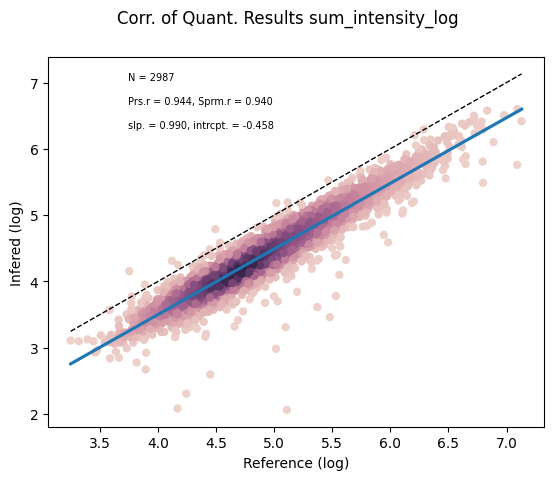

In [28]:
from result_analysis.result_analysis import SBSResult
import pandas as pd

maxquant_merge = pd.read_pickle(
    os.path.join(result_dir, "maxquant_result_merged_cleaned.pkl")
)
sbs_ims_result = SBSResult(
    maxquant_ref_df=maxquant_merge,
    maxquant_merge_df=maxquant_merge,
    maxquant_exp_df=None,
    # sum_raw=train_df,
    sum_gaussian=rt_label_df,
    ims=True,
)
sbs_ims_result.plot_intensity_corr(
    ref_col="Intensity", inf_col="sum_intensity", contour=False
)

2024-06-13 13:16:24,278 - result_analysis.result_analysis - INFO - Reference shape: (31029, 32)
2024-06-13 13:16:24,308 - result_analysis.result_analysis - DEBUG - Reference shape after merging activation sum: (31029, 34)
2024-06-13 13:16:24,309 - result_analysis.result_analysis - DEBUG - sum cols: ['sum_intensity', 'pept_mz_rank']
2024-06-13 13:16:24,317 - result_analysis.result_analysis - DEBUG - Reference non zero shape: (31027, 34)


Data:  Intensity_log sum_intensity_log , slope =  0.988 , intercept =  -0.433 , PearsonR =  0.956 , SpearmanR =  0.948


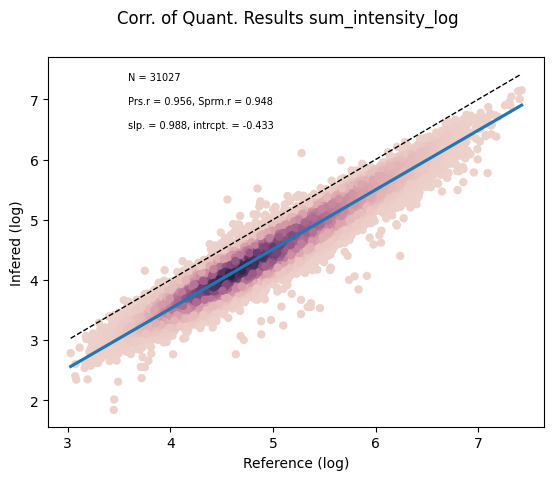

In [40]:
maxquant_merge = pd.read_pickle(
    os.path.join(result_dir, "maxquant_result_merged_cleaned.pkl")
)
sbs_ims_result = SBSResult(
    maxquant_ref_df=maxquant_merge,
    maxquant_merge_df=maxquant_merge,
    maxquant_exp_df=None,
    # sum_raw=train_df,
    sum_gaussian=rt_im_label_df,
    ims=True,
)
sbs_ims_result.plot_intensity_corr(
    ref_col="Intensity", inf_col="sum_intensity", contour=False
)

In [31]:
result_parent_dir = "/cmnfs/proj/ORIGINS/data/brain/FreshFrozenBrain/SingleShot/DDA/"
result_base_dir = "frame0_1830_ssDDA_P064428_Fresh1_5ug_R1_BD5_1_4921_ScanByScan_RTtol0.9_threshold_missabthres0.5_convergence_NoIntercept_pred_mzBinDigits2_imPeakWidth4_deltaMobilityThres80"
result_dir = os.path.join(result_parent_dir, result_base_dir)
mobility_values_df = pd.read_csv(
    os.path.join(result_dir, "mobility_values.csv"), index_col=0
)
ms1scans = pd.read_csv(os.path.join(result_dir, "ms1scans.csv"), index_col=0)

In [32]:
mobility_values_df["step_diff"] = mobility_values_df["mobility_values"].diff(1)
ms1scans["step_diff"] = ms1scans["Time"].diff(1)

<Axes: >

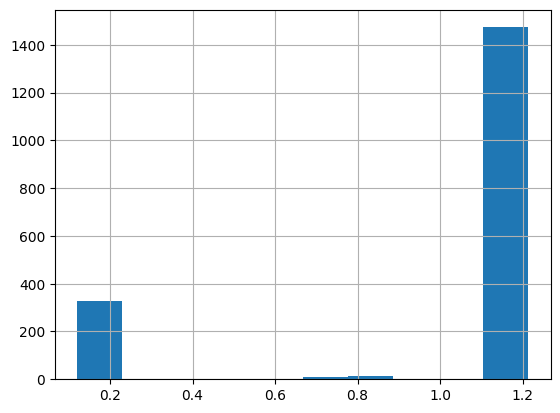

In [33]:
ms1scans["step_diff"].hist()

<Axes: >

<Axes: >

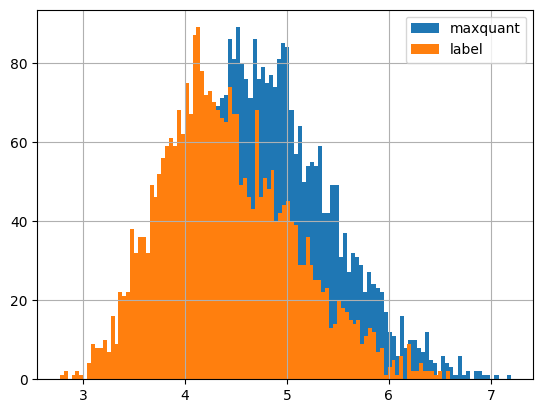

In [35]:
np.log10(maxquant_merge.iloc[idx]["Intensity"] + 1).hist(bins=100, label="maxquant")
np.log10(rt_im_label_df["sum_intensity"]).hist(bins=100, label="label")
plt.legend()

In [1]:
rt_im_label_df["corrected_intensity"] = rt_im_label_df["sum_intensity"]
sbs_ims_result = SBSResult(
    maxquant_ref_df=maxquant_merge,
    maxquant_merge_df=maxquant_merge,
    maxquant_exp_df=None,
    # sum_raw=train_df,
    sum_gaussian=rt_im_label_df,
    ims=True,
)
sbs_ims_result.plot_intensity_corr(
    ref_col="Intensity", inf_col="corrected_intensity", contour=False
)

NameError: name 'rt_im_label_df' is not defined